# interfax

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!cat '/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'

import codecs
import os
import time
import csv
import sys

from enum import Enum
from collections import Counter
from razdel import tokenize
from razdel import sentenize

from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader


class PathPattern(Enum):

    doc_pattern = r".*\.csv"
    cat_pattern = r"(\w+)/*"


class CSVCorpusReader(CategorizedCorpusReader, CorpusReader):
    """
    Объект чтения csv файлов для получения возможности
    дополнительной предварительной обработки.
    """

    def __init__(self, root, fileids=PathPattern.doc_pattern.value, encoding='utf8', **kwargs):
        """
        Инициализирует объект чтения промежуточного обработанных файлов
        корпуса.
        """

        # Добавить шаблон категорий, если он не был передан в класс явно
        if not any(key.startswitch('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = PathPattern.cat_pattern.value

        # Инициализировать объекты

In [3]:
!ls /content/gdrive/My\ Drive/experiments/001-exp/scripts/*.py

'/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/experiments/001-exp/scripts/')

In [5]:
!pip install razdel

In [0]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [0]:
import sys

In [0]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [0]:
from reader import CSVCorpusReader

In [0]:
# Создадим объект чтения корпуса
# data = CSVCorpusReader('../../../data/interim')
data = CSVCorpusReader('/content/gdrive/My Drive/data/interim/')

In [9]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'rt', 'tass']

In [10]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv', 'interfax/interfax.csv', 'rt/rt.csv', 'tass/tass.csv']

## Общий предварительный анализ

In [11]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'interfax')

{'Время обработки в секундах': 1304.9783427715302,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 543964,
 'Количество повторяющихся новостей': 241,
 'Количество предложений': 3912978,
 'Количество пустных новостных элементов': 0,
 'Количество слов': 124829733,
 'Количество токенов (словарь)': 874994,
 'Количество файлов': 1,
 'Конечная дата в обработке': '2019-05-27 08:09:00',
 'Коэффициент лексического разнообразия (lexical diversity)': 142.66353026420754,
 'Начальная дата в обработке': '2008-02-11 03:47:00',
 'Среднее количество новостей по отношению к файлам': 543964.0,
 'Среднее количество предложений в новостях': 7.193450301858211}

## EDA

In [0]:
list_data = list(data.docs(None, 'interfax'))

In [13]:
# Так выглядет датасет
list_data[:5]

[OrderedDict([('date', '2019-04-30 13:26:00'),
              ('url', 'https://www.sport-interfax.ru/659837'),
              ('edition', 'www.sport-interfax.ru'),
              ('topics', 'Спорт'),
              ('authors', ''),
              ('title',
               'Российского чемпиона мира по греко-римской борьбе отстранили за допинг'),
              ('text',
               'Москва. 30 апреля. INTERFAX.RU - Чемпион мира по греко-римской борьбе 2014 года Чингиз Лабазанов наказан дисквалификацией сроком на один год за нарушение антидопинговых правил, сообщает во вторник пресс-служба Российского антидопингового агентства во вторник.n"Федерация борьбы России, по решению РАА РУСАДА, вынесла решение, по которому спортсмен Лабазанов Чингиз лишен права на 1 год за нарушение ст. 2.4 Всероссийских антидопинговых правил, период, начинающийся 11 апреля 2019 года", - говорится в сообщении.nКроме этого, на четыре года за нарушение антидопинговых правил отстранен еще один отечественный борец - Вал

In [0]:
# Можно в пандас загрузить и посмотреть

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(list_data)

In [16]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,NaN
0,2019-04-30 13:26:00,https://www.sport-interfax.ru/659837,www.sport-interfax.ru,Спорт,,Российского чемпиона мира по греко-римской бор...,Москва. 30 апреля. INTERFAX.RU - Чемпион мира ...,-,-,-,-,-,-,-,-,-,[]
1,2019-05-07 12:46:00,https://www.sport-interfax.ru/660425,www.sport-interfax.ru,Спорт,,Первый канал покажет все матчи россиян на ЧМ п...,Москва. 7 мая. INTERFAX.RU - Первый канал объя...,-,-,-,-,-,-,-,-,-,[]
2,2019-05-08 12:57:00,https://www.sport-interfax.ru/660543,www.sport-interfax.ru,Спорт,,Семак выразил надежду на новый контракт Кокори...,Москва. 8 мая. INTERFAX.RU - Главный тренер пе...,-,-,-,-,-,-,-,-,-,[]
3,2019-05-09 00:06:00,https://www.sport-interfax.ru/660618,www.sport-interfax.ru,Спорт,,"""Тоттенхэм"" стал вторым финалистом Лиги чемпионов",В финале он сыграет с другим представителем Ан...,-,-,-,-,-,-,-,-,-,[]
4,2019-05-14 14:32:00,https://www.sport-interfax.ru/661091,www.sport-interfax.ru,Спорт,,Претендовавшего на участие в ОИ скейтбордиста ...,Москва. 14 мая. INTERFAX.RU - Российский скейт...,-,-,-,-,-,-,-,-,-,[]


### Обработка словаря

In [0]:
# Соберем токены
tokens = data.gettokens

In [0]:
punctuation = list(punctuation)

In [0]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [0]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [0]:
stopwords_01 = open('/content/gdrive/My Drive/data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('/content/gdrive/My Drive/data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [0]:
stopwords = stopwords_01 + stopwords_02

In [0]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [26]:
Counter(tokens).most_common(20)

[('в', 4934930),
 ('и', 2101325),
 ('на', 2019091),
 ('по', 1241061),
 ('с', 1062573),
 ('что', 1061942),
 ('не', 791637),
 ('ru', 519044),
 ('interfax', 497116),
 ('москва', 460128),
 ('о', 453542),
 ('из', 415657),
 ('к', 412233),
 ('за', 369973),
 ('как', 363068),
 ('он', 358984),
 ('для', 336425),
 ('а', 317637),
 ('года', 312658),
 ('его', 301170)]

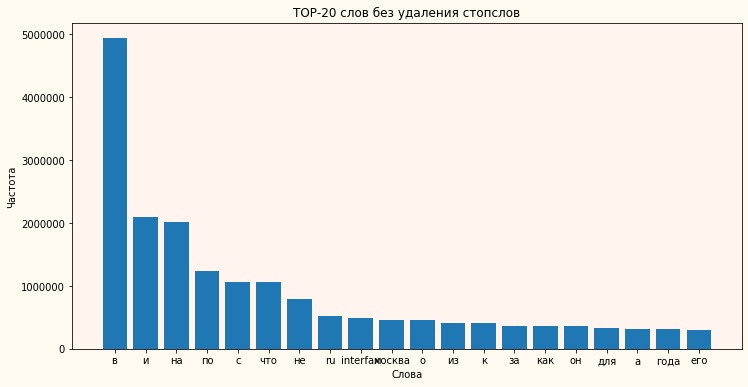

In [27]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [28]:
Counter(tokens_without_stopwords).most_common(20)

[('ru', 519044),
 ('interfax', 497116),
 ('рф', 278968),
 ('россии', 271150),
 ('сообщил', 178848),
 ('сша', 163765),
 ('заявил', 159943),
 ('интерфаксу', 154161),
 ('словам', 148919),
 ('1', 130322),
 ('рублей', 122959),
 ('млрд', 118705),
 ('млн', 116142),
 ('отметил', 108460),
 ('данным', 106693),
 ('тыс', 103982),
 ('области', 102338),
 ('сообщает', 99127),
 ('сообщили', 98773),
 ('говорится', 97000)]

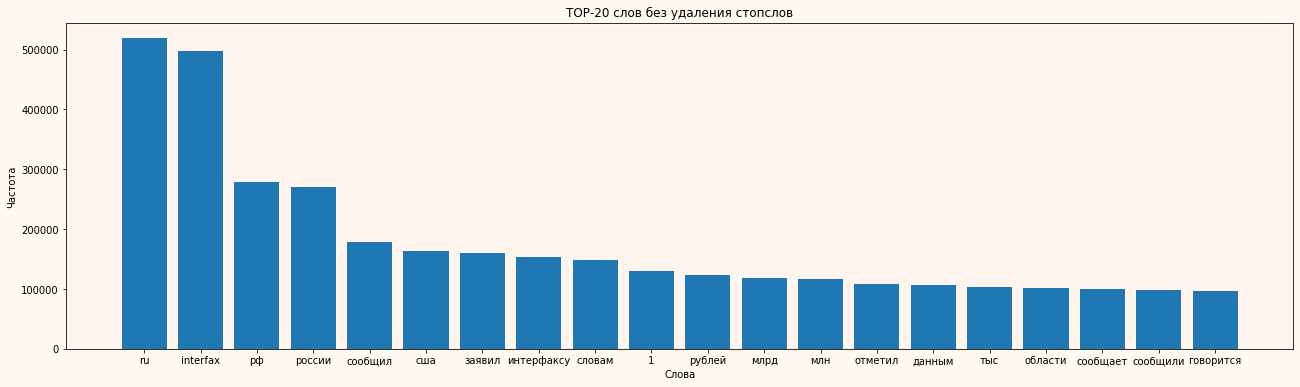

In [29]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [0]:
list_topics = list(data.listcolumns(None, 'interfax', 'topics'))

In [31]:
len(set(list_topics))

8

### Рубрики в разрезе количества новостей

In [32]:
Counter(list_topics).most_common(8)

[('В России', 286150),
 ('В мире', 102958),
 ('Экономика', 80061),
 ('Спорт', 42994),
 ('Москва', 18426),
 ('Культура', 12763),
 ('Интервью', 583),
 ('Пресс-центр', 29)]

## Распределение количества новостей по месяцам

### Удаление дубликатов

In [0]:
# Новый словарь, ключами которого будут новости, таким образом будет создан
# новый словарь, без дубликатов
news_by_dict = {i['text']: i for i in list_data}
new_items = list(news_by_dict.values())

In [34]:
# Проверь, что количество дубликатов совпало с тем, что были в предварительном анализе
# все верно
len(list_data) - len(new_items)

241

### Получение распределения

In [0]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [0]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x['date']) for x in new_items]

In [0]:
month_year = Counter(list_dates)

In [38]:
len(month_year)

136

In [39]:
month_year.most_common(20)

[('07-2015', 5484),
 ('02-2014', 5402),
 ('03-2014', 5372),
 ('03-2015', 5307),
 ('04-2015', 5285),
 ('09-2015', 5255),
 ('08-2015', 5221),
 ('10-2013', 5220),
 ('10-2008', 5077),
 ('12-2008', 5011),
 ('04-2013', 4900),
 ('06-2015', 4899),
 ('12-2014', 4896),
 ('11-2013', 4889),
 ('04-2016', 4845),
 ('10-2015', 4808),
 ('06-2013', 4789),
 ('06-2016', 4785),
 ('07-2016', 4750),
 ('04-2014', 4733)]

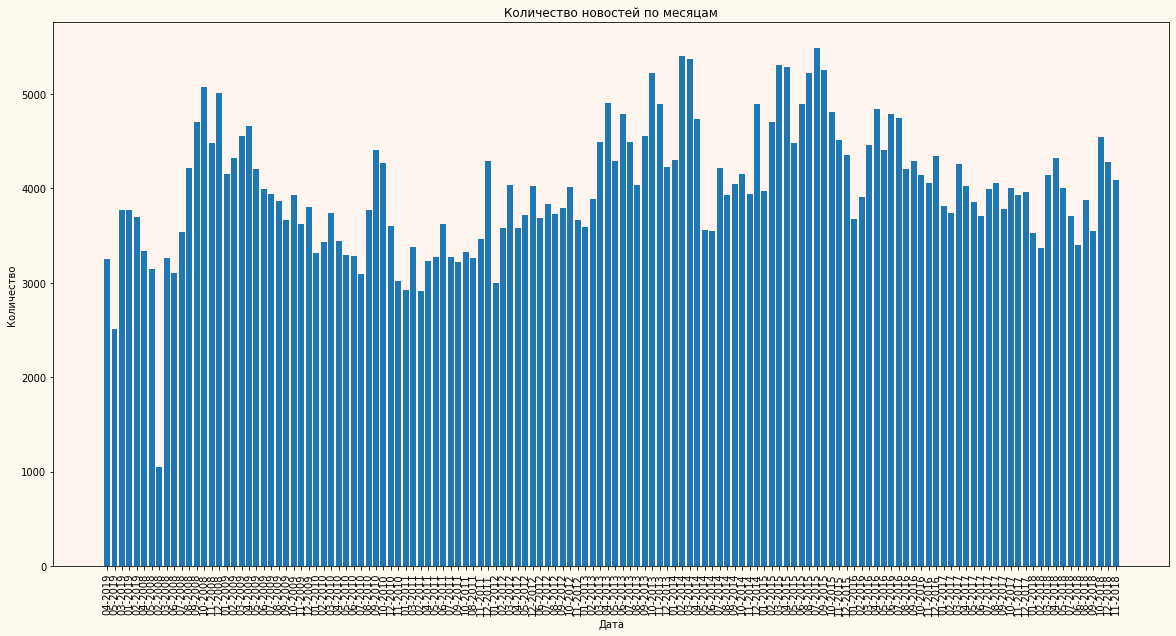

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()